In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path ="kvant1-spektrometer-data"
files = {}
for i in os.listdir(path):
    files[str(i)] = np.array(pd.read_csv(path+"\\"+i, engine='python'))

In [65]:
print(files.keys())

experiments = ['uv_lys.csv','blå_lys.csv', 'grøn_lys.csv', 'gul_lys.csv','rød_lys.csv']

def rms(l):
    return np.sqrt(np.mean(l**2))

def closest(n,l):
    return sorted(l, key=lambda x : abs(x-n))[0]

names = ["UV LED","Blue LED","Green LED","Yellow LED","Red LED"]


dict_keys(['blå_lys.csv', 'grøn_lys.csv', 'gul_lys.csv', 'hydrogen_max.csv', 'hydrogen_no_clip.csv', 'refrence_100ms_avg_over_100.csv', 'refrence_25ms_avg_over_100.csv', 'rød_lys.csv', 'uv_lys.csv'])


In [66]:
back25 = [files["refrence_25ms_avg_over_100.csv"][:,0],files["refrence_25ms_avg_over_100.csv"][:,1]]
back100 = [files["refrence_100ms_avg_over_100.csv"][:,0],files["refrence_100ms_avg_over_100.csv"][:,1]]

<Figure size 432x288 with 0 Axes>

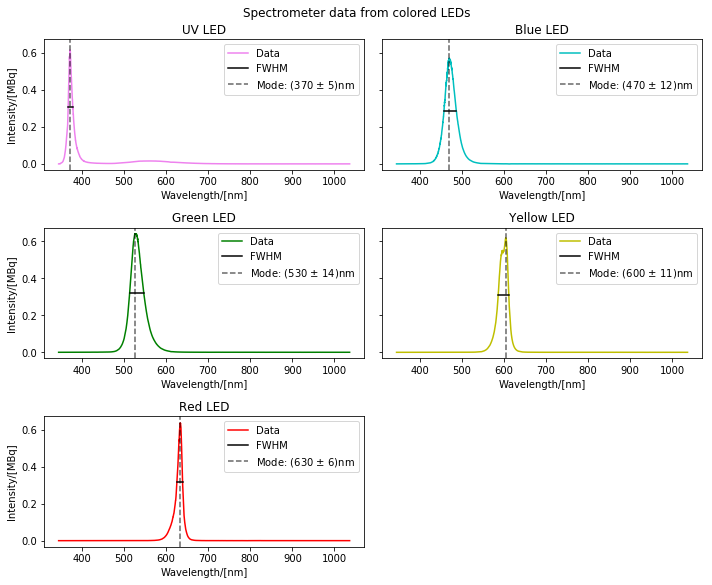

In [109]:
plt.figure()

fig, axs = plt.subplots(3,2,figsize=(10,8),sharey = True,sharex=False)
fig.suptitle("Spectrometer data from colored LEDs",size='larger',position = (0.5,1.01))
peaks = []
sigmas = []
cs=['violet','c','g','y','r']
for i,e in enumerate(experiments):
    #ax = plt.figure()
    ax = axs.flatten()[i]
    x = files[e][:,0]
    y = (files[e][:,1]-back25[1])*10/10**6

    ax.plot(x,y,label = "Data",c=cs[i])


    peak = x[np.argmax(y)]
    peaks.append(peak)

    hm = x[np.where(y>np.max(y)/2)]
    fwhm = hm[-1]-hm[0]
    ax.plot([hm[0],hm[-1]],[np.max(y)/2,np.max(y)/2],'black',label = "FWHM")
#    sigmay = rms(y)
    
#     sigmaxup = abs(peak-x[y==closest(np.max(y)+sigmay,y)][0])
#     sigmaxdown = abs(peak-x[y==closest(np.max(y)-sigmay,y)][0])

    sigmax = fwhm/(2*np.sqrt(2*np.log(2)))
    sigmas.append(sigmax)

    ax.axvline(peak,c = "black",label = "Mode: ("+str(int(np.round(peak/10)*10))+" $\pm$ "+str(int(np.round(sigmax)))+")nm",ls='--',alpha=0.6)
    #ax.errorbar(peak,np.max(y),xerr=sigmax,c='black',ls="none",capsize=2,label = "Error")
    
    
    if(i%2==0):
        ax.set_ylabel("Intensity/[MBq]")
    ax.set_xlabel("Wavelength/[nm]")
    ax.set_title(names[i])
    ax.legend()
    #ax.show()

fig.delaxes(axs[2,1])

    
#plt.xlabel("Wavelength/[nm]")

plt.tight_layout()
plt.savefig("flotplotkvant11")
plt.show()

In [69]:
peaks = np.array(peaks)*10**(-9)
sigmas = np.array(sigmas)*10**(-9)

h =  6.62607015e-34
c = 299792458

E = lambda lamb: h*c/lamb

sigmaE = h*c/(peaks)**2*sigmas

print(E(peaks)/1.602176634e-19)
print(sigmaE/1.602176634e-19)


[3.33067021 2.63443041 2.35255206 2.05149577 1.9559878 ]
[0.04076983 0.06931655 0.06278339 0.03595122 0.01729745]


Peaks: [434.78 486.64 656.62]
Peak errors: [0.5, 0.4416473361497545, 0.5010998621699583]
Energies: [2.85165367 2.54776012 1.88821843]
Uncertanties: [0.01311769 0.01185428 0.0057387 ]


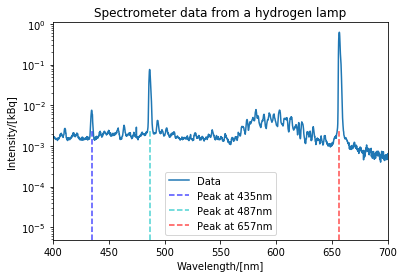

In [126]:
%matplotlib inline
from scipy.signal import find_peaks

balmer = [434.0462,486.13615,656.45377]



x,y = files['hydrogen_no_clip.csv'][:,0],((files['hydrogen_no_clip.csv'][:,1]-back100[1]))
ypeks = find_peaks(y,prominence = 600)[0]
ypeks = np.delete(ypeks,2)

peks = x[ypeks]
print("Peaks:",peks)

h_sigmas = []
for p in range(len(peks)):
    xran = (peks[p]-20,peks[p]+20)
    HM = y[ypeks[p]]/2
    #print(np.intersect1d(np.intersect1d(np.where(y>HM),np.where(x>xran[0])),np.where(x<xran[1])))
    FW = x[np.intersect1d(np.intersect1d(np.where(y>HM),np.where(x>xran[0])),np.where(x<xran[1]))]
    FWHM = FW[-1]-FW[0]
    h_sigmas.append(FWHM/(2*np.sqrt(2*np.log(2))))
    

h_sigmas[0] = 0.5
print("Peak errors:",h_sigmas)



h =  6.62607015e-34
c = 299792458

E = lambda lamb: h*c/lamb
h_sigmas_s = np.array(h_sigmas)*10**(-9)
sigmaE = h*c/(peks*h_sigmas*10**(-9))**2*(h_sigmas_s)

print("Energies:",E(peks*10**(-9))/1.602176634e-19)
print("Uncertanties:",sigmaE/1.602176634e-19)

y/=100000
plt.figure()
plt.yscale("log")
plt.ylim()
plt.plot(x,y,label = "Data")

plt.xlabel("Wavelength/[nm]")
plt.ylabel("Intensity/[kBq]")

cs2 = ['b','c','r']
for i,p in enumerate(peks):
    plt.axvline(p,c=cs2[i],ymax = 0.5,ls = '--',alpha=0.7,label = "Peak at "+str(int(np.round(p)))+"nm")
    #plt.axvline(p,c=(0,0,0*c/10),ymin = 0.6,ls = '--',alpha=0.3)#,label = "Balmer at "+str(int(np.round(b)))+"nm")
    c+=3.33
    
    
#plt.errorbar(peks,y[ypeks],xerr=np.array(h_sigmas)*10,c='black',ls="none",capsize=1,label = "Estimated errors x10")
plt.xlim(400,700)

plt.title("Spectrometer data from a hydrogen lamp")
plt.legend()
plt.savefig("donedone")
plt.show()


In [70]:
h,c,R = 6.62607004e-34,299792458,10973731.6

En = lambda n: -h*c*R/(n)**2

for n in range(1,5):
    print(En(n))

-2.1798723312401666e-18
-5.449680828100416e-19
-2.4220803680446297e-19
-1.362420207025104e-19


(0, 2000)

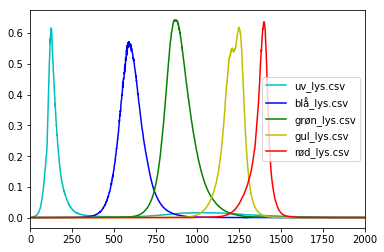

In [71]:

for i,e in enumerate(experiments):
    y = (files[e][:,1]-back25[1])*10/10**6
    plt.plot(y,label = str(e),c=cs[i])
plt.legend()
plt.xlim(0,2000)

In [85]:
x = ("la","lalala")
print("say {} haha {}".format(*x))

say la haha lalala
